In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv('/content/drive/MyDrive/timeseriesmachinelearning/realstudies/realstudies1/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

Now, we create a data structure with 60 timesteps and one output as an Array of x_train and y_train.

In [4]:
##Now, we create a data structure with 60 timesteps and one output as an Array of x_train and y_train.
##width(whereby each of them can cover 60 as width)
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

Here we have done reshaping of x_train data.

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

Now, the following libraries are required for building the RNN model and perform its operations. We have imported the Keras library and its packages.

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Let’s initialize our RNN.

In [7]:
regressor = Sequential()

Now, add the first layer of LSTM and some Dropout regularisation

In [8]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

Now, add the second layer of LSTM and some Dropout regularisation

In [9]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

Now, add the third layer of LSTM and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

Let’s add an output layer.

In [12]:
regressor.add(Dense(units = 1))

Next, we will compile our RNN model here.

In [13]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

We are using a training dataset to fit the RNN model.

In [14]:
regressor.fit(X_train, y_train, epochs = 300, batch_size = 32)

Epoch 1/300
38/38 [==============================] - 24s 13ms/step - loss: 0.0771
Epoch 2/300
38/38 [==============================] - 0s 10ms/step - loss: 0.0055
Epoch 3/300
38/38 [==============================] - 0s 11ms/step - loss: 0.0054
Epoch 4/300
38/38 [==============================] - 0s 10ms/step - loss: 0.0048
Epoch 5/300
38/38 [==============================] - 0s 10ms/step - loss: 0.0037
Epoch 6/300
38/38 [==============================] - 0s 10ms/step - loss: 0.0035
Epoch 7/300
38/38 [==============================] - 0s 10ms/step - loss: 0.0041
Epoch 8/300
38/38 [==============================] - 0s 11ms/step - loss: 0.0036
Epoch 9/300
38/38 [==============================] - 0s 10ms/step - loss: 0.0038
Epoch 10/300
38/38 [==============================] - 0s 10ms/step - loss: 0.0043
Epoch 11/300
38/38 [==============================] - 0s 10ms/step - loss: 0.0035
Epoch 12/300
38/38 [==============================] - 0s 10ms/step - loss: 0.0032
Epoch 13/300
38/38 [====

Now our next part is to predict stock prices and visualize their results. Here we have used the real stock price of 2017 with data of google_stock_price.csv.

In [15]:
dataset_test = pd.read_csv('/content/drive/MyDrive/timeseriesmachinelearning/realstudies/realstudies1/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

Getting the predicted stock price of 2017

In [16]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

The final step is to visualize our data results using the matplotlib library.

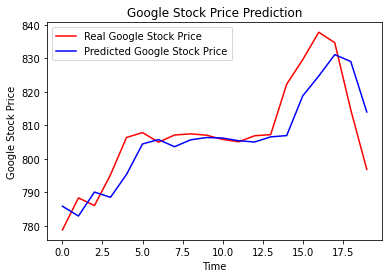

In [17]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [18]:
# calculate MAE 
from sklearn.metrics import mean_squared_error, mean_absolute_error
mae = mean_absolute_error(predicted_stock_price, real_stock_price)
print(' mean_absolute_error: %.6f' % mae)

 mean_absolute_error: 6.102757
